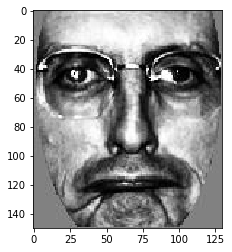

In [34]:
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img
import numpy as np
## Get current directory
import os
#os.getcwd()

# Compute for test image
test_image = img.imread('/home/jovyan/StarterFiles/Train1/00001fa010.930831.jpg') ## Load an image as numpy array
# Get dimensions of face
ilength, iwidth = test_image.shape
len_isq = ilength*iwidth
# Get rho face vector of test image
rho_test = test_image.reshape(test_image.shape[0]*test_image.shape[1])

# Plot the test image
plt.imshow(test_image, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()


In [35]:
traininglist = (os.listdir('/home/jovyan/StarterFiles/Train1/'))
M = len(traininglist)
print(M)

3772


In [36]:
# Initialize array for each face, mean face, and count
all_vecs = np.zeros((len_isq, M))
sum_trainingfaces = np.zeros((len_isq))
count = 0

# Iterate through all files in the training set
for image in traininglist:
    # Get image filename from traininglist
    filename = '/home/jovyan/StarterFiles/Train1/' + image
    # Load an image as numpy array
    image = img.imread(filename) 
    # Reshape image into a 1D vector
    img_vect = image.reshape(image.shape[0]*image.shape[1])
    
    # For checking
    #if count < 5: 
    #    print(img_vect, '\n')
        
    # Add face vector to all_vecs
    all_vecs[:,count] = img_vect
    # Summation over face vectors
    sum_trainingfaces += img_vect
    
    count = count + 1

In [37]:
psi_train = (1/M)*sum_trainingfaces
psi_train

array([129.04931071, 130.16675504, 129.71182397, ..., 129.21818664,
       129.21818664, 129.21818664])

In [38]:
phi_train = rho_test - psi_train
phi_train

array([ 0.95068929, -2.16675504, -2.71182397, ..., -0.21818664,
       -0.21818664, -0.21818664])

In [ ]:
# Compute covariance matrix C

C = (1/M)*